In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4CEF-E2B2

 Directory of C:\Users\HP\Documents\Assignment questions\Multilinear regression

11-05-2023  06:21    <DIR>          .
25-04-2023  21:22    <DIR>          ..
11-05-2023  06:21    <DIR>          .ipynb_checkpoints
02-05-2023  05:12             2,436 50_Startups.csv
10-05-2023  08:17           639,239 MLR_50 startups.ipynb
09-04-2023  14:31               468 proble_statement(50_startups).txt
09-04-2023  14:30             1,752 Toyota Corolla.txt
09-04-2023  14:31           224,041 ToyotaCorolla.csv
11-05-2023  06:21                72 Untitled.ipynb
               6 File(s)        868,008 bytes
               3 Dir(s)  425,610,321,920 bytes free


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [5]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')

In [6]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
data_new=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data_new.rename(columns={"Age_08_04":"Age"},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9836\2831928229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.rename(columns={"Age_08_04":"Age"},inplace=True)


In [11]:
data_new

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
data_new.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [13]:
data_new.drop_duplicates()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [15]:
data_new.isna().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

<AxesSubplot:>

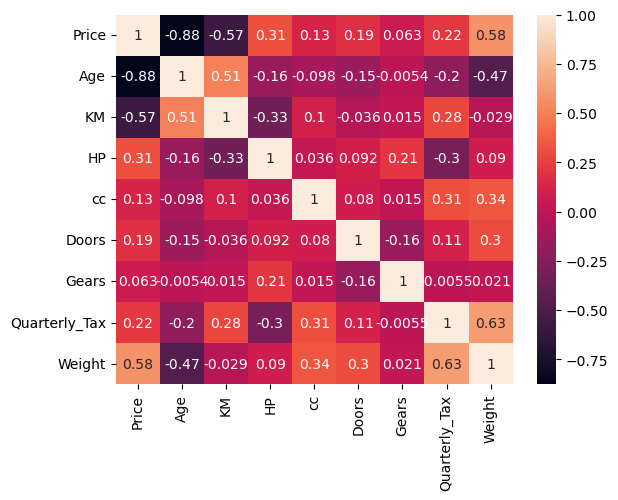

In [17]:
sns.heatmap(data_new.corr(),annot=True)

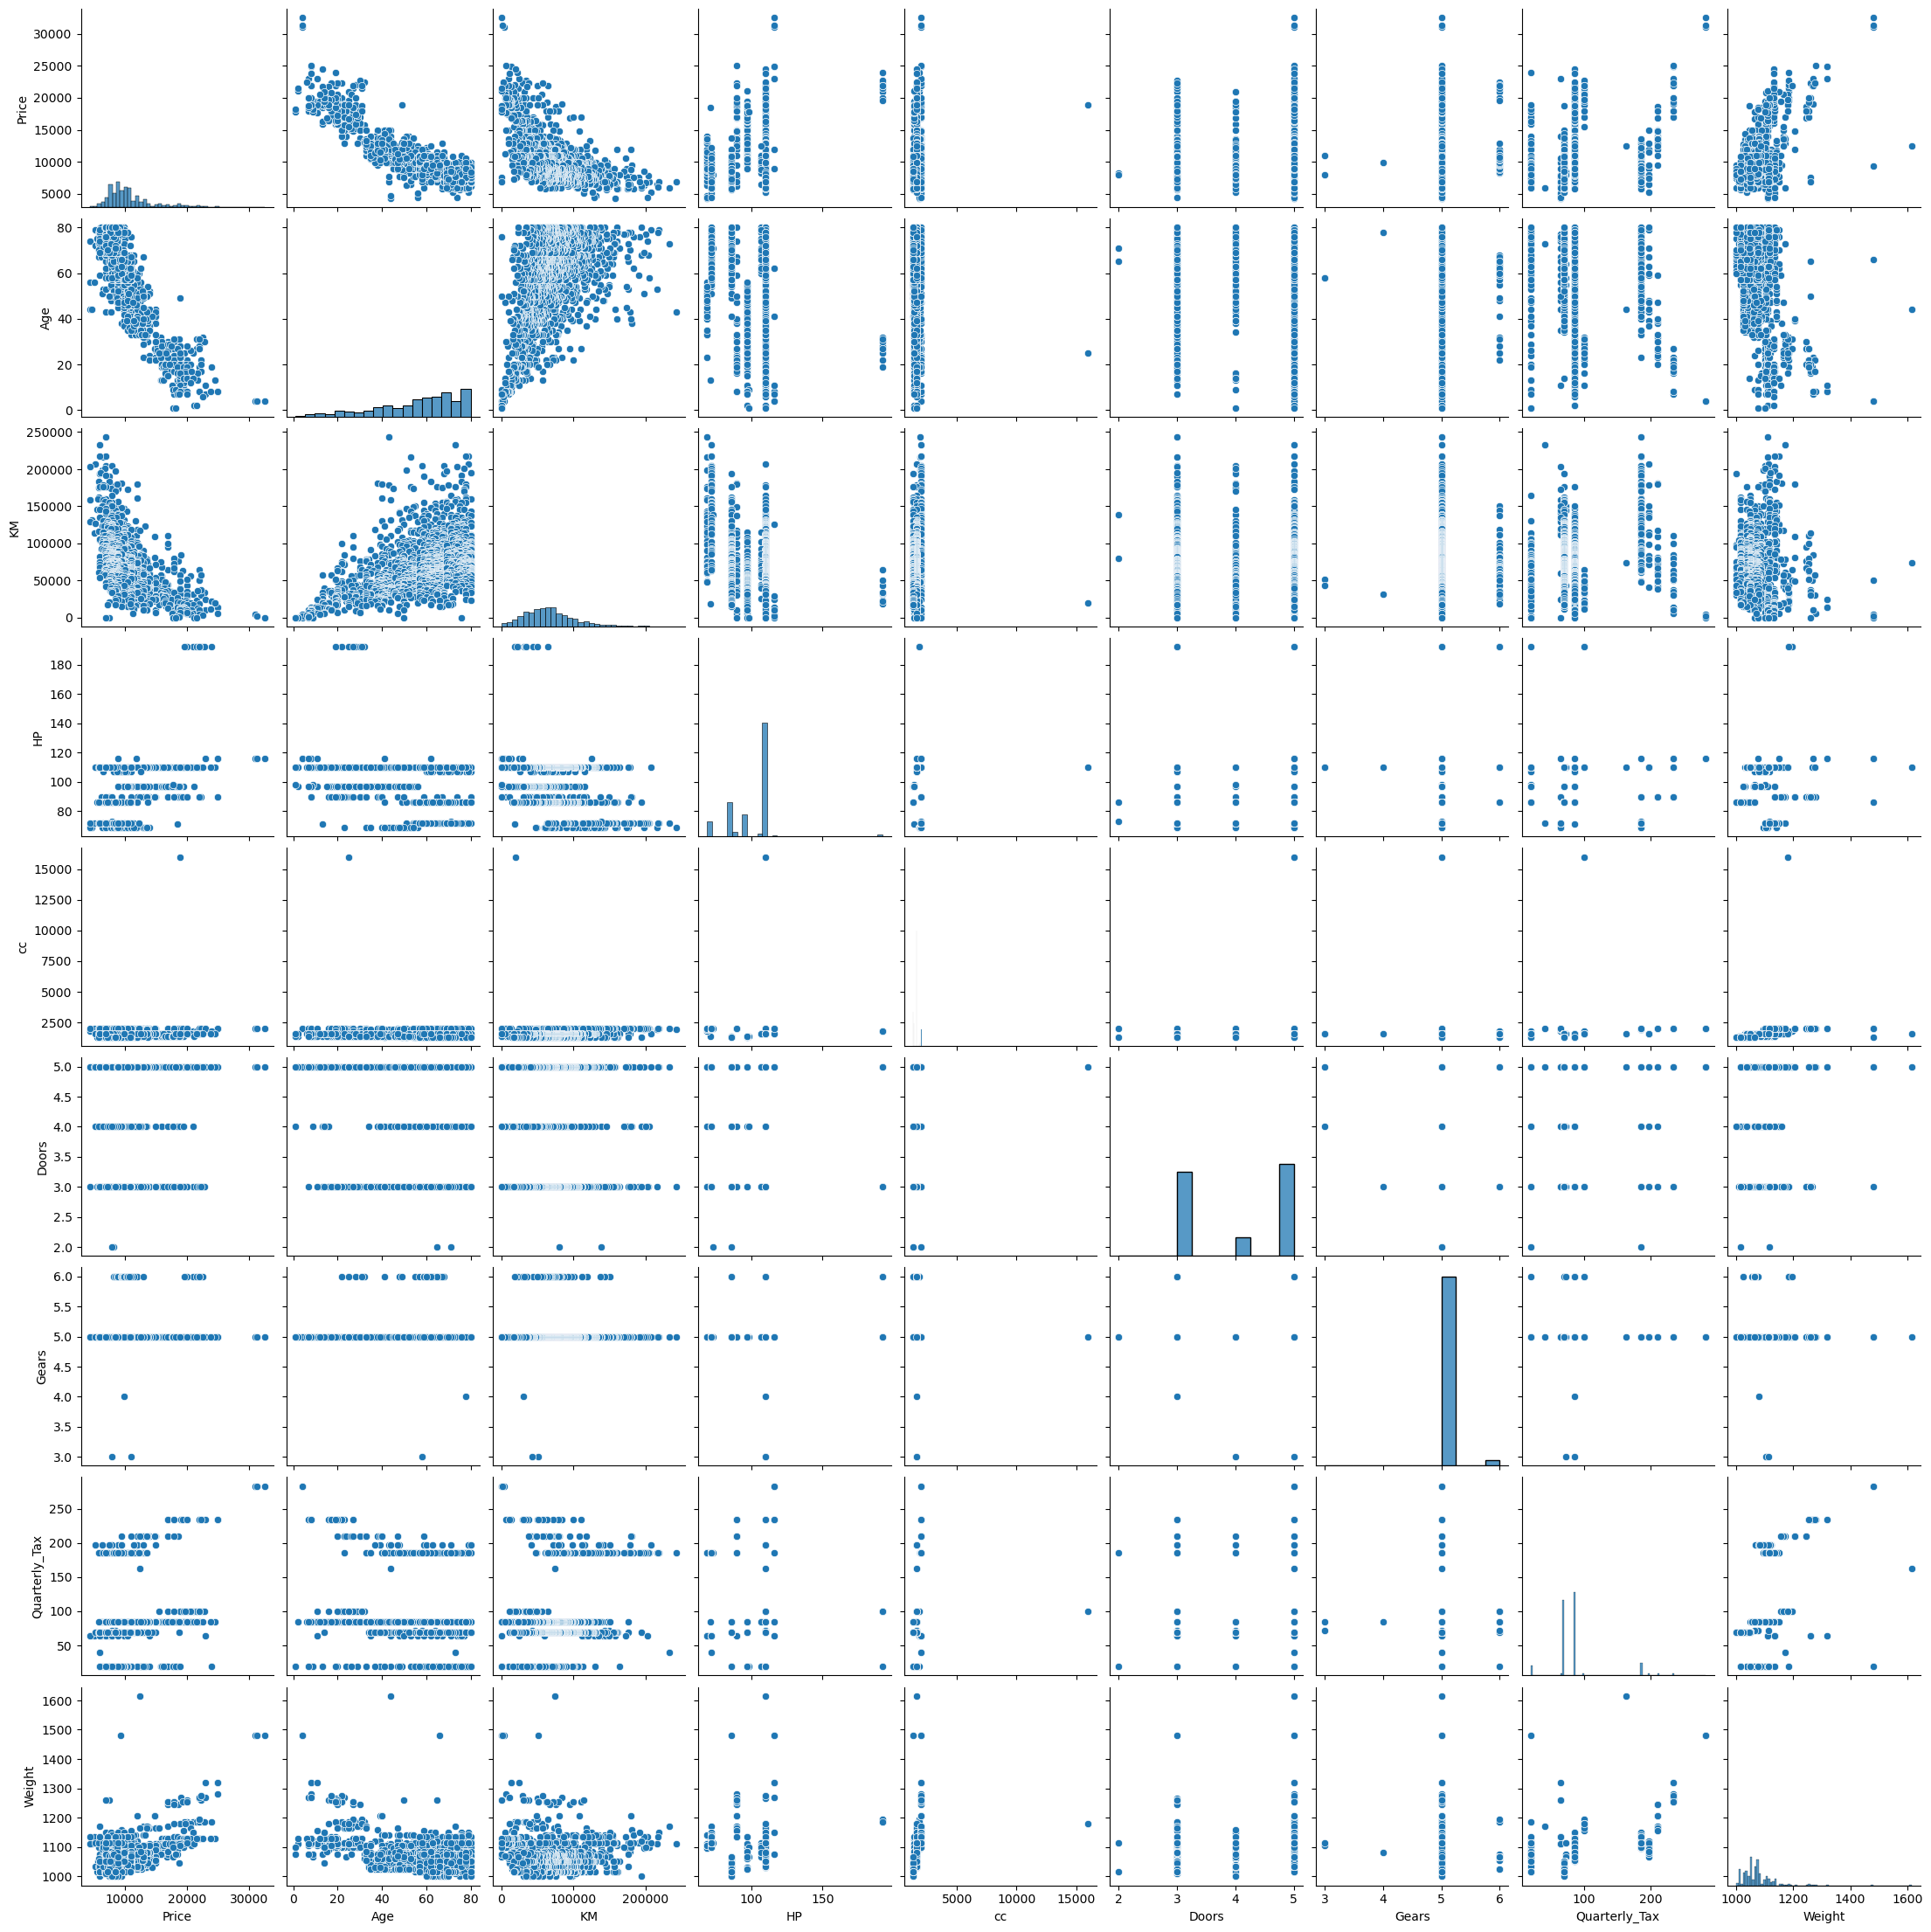

In [18]:
sns.pairplot(data_new)

In [20]:
data_new.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [23]:
model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data_new).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        06:41:18   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#calculating VIF values
rqs_age=smf.ols("Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data_new).fit().rsquared
vif_age = 1/(1-rqs_age)

rqs_KM=smf.ols("KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data_new).fit().rsquared
vif_KM=1/(1-rqs_KM)

rqs_hp=smf.ols("HP~Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=data_new).fit().rsquared
vif_hp=1/(1-rqs_hp)

rqs_cc=smf.ols("cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=data_new).fit().rsquared
vif_cc=1/(1-rqs_cc)

rqs_Doors=smf.ols("Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=data_new).fit().rsquared
vif_doors=1/(1-rqs_Doors)

rqs_Gears=smf.ols("Gears~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=data_new).fit().rsquared
vif_gears=1/(1-rqs_Gears)

rqs_Quarterly_Tax=smf.ols("Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight",data=data_new).fit().rsquared
vif_Quarterly_Tax=1/(1-rqs_Quarterly_Tax)

rqs_Weight=smf.ols("Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=data_new).fit().rsquared
vif_weight=1/(1-rqs_Weight)

In [45]:
data_new.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [49]:
V1={"variables":['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],"vif":[vif_age,vif_KM,vif_hp,vif_cc,vif_doors,vif_gears,vif_Quarterly_Tax,vif_weight]}
vif_frame=pd.DataFrame(V1)
vif_frame

,variables,vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


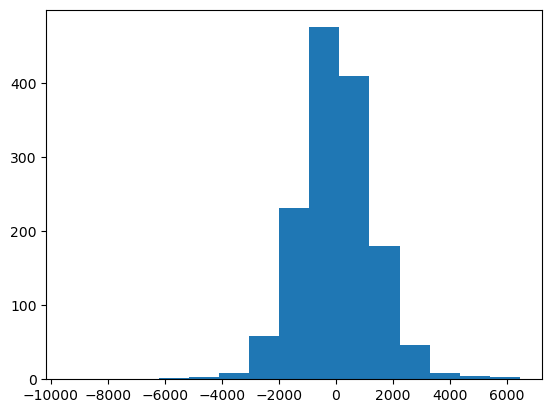

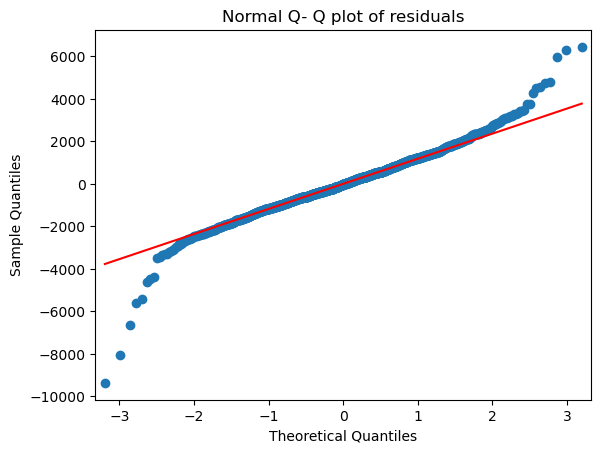

In [51]:
plt.hist(model.resid,bins=15)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q- Q plot of residuals")
plt.show()

In [52]:
#residual plot of homoscedasticity

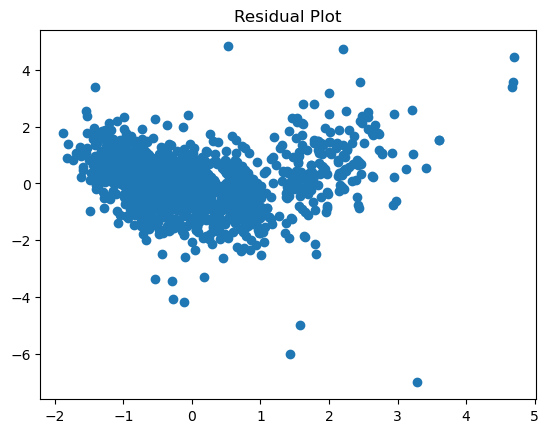

In [55]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.show()

In [57]:
data_new.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [58]:
# residual against regressor

eval_env: 1


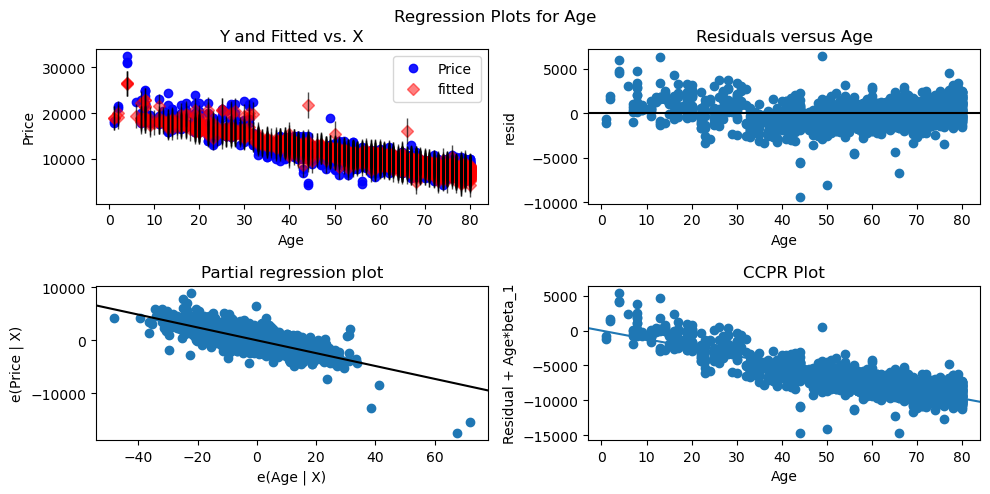

In [60]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

eval_env: 1


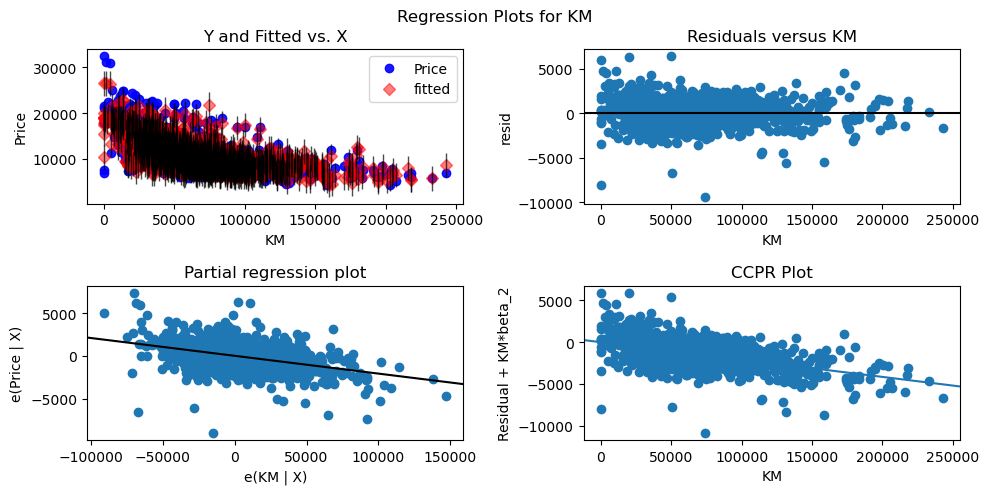

In [61]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


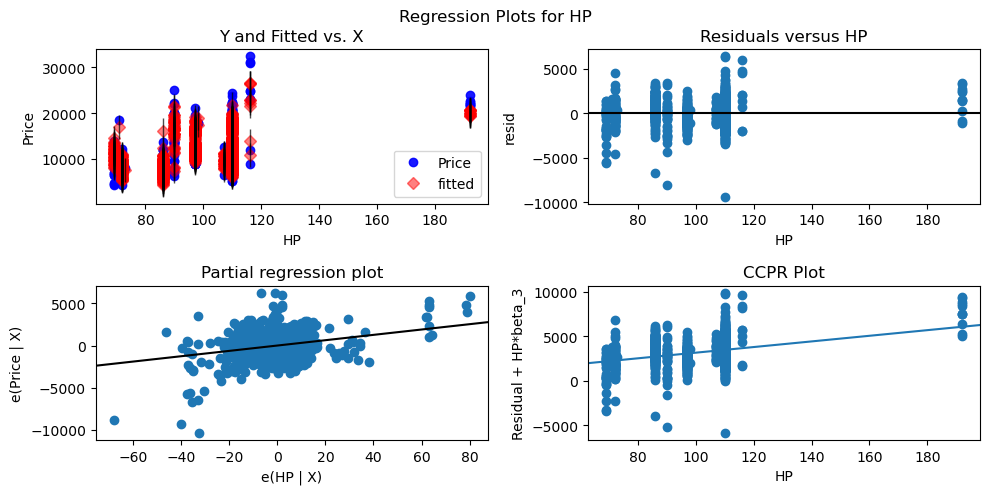

In [62]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


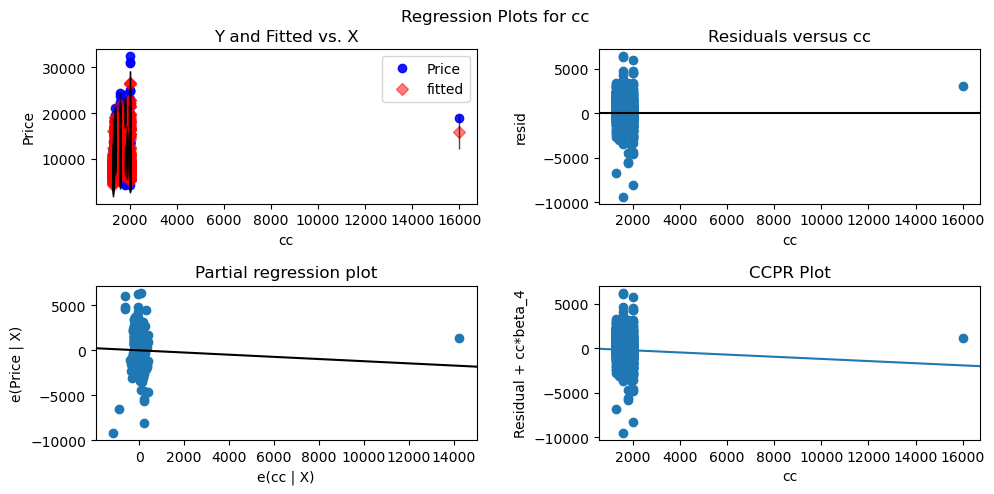

In [63]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

eval_env: 1


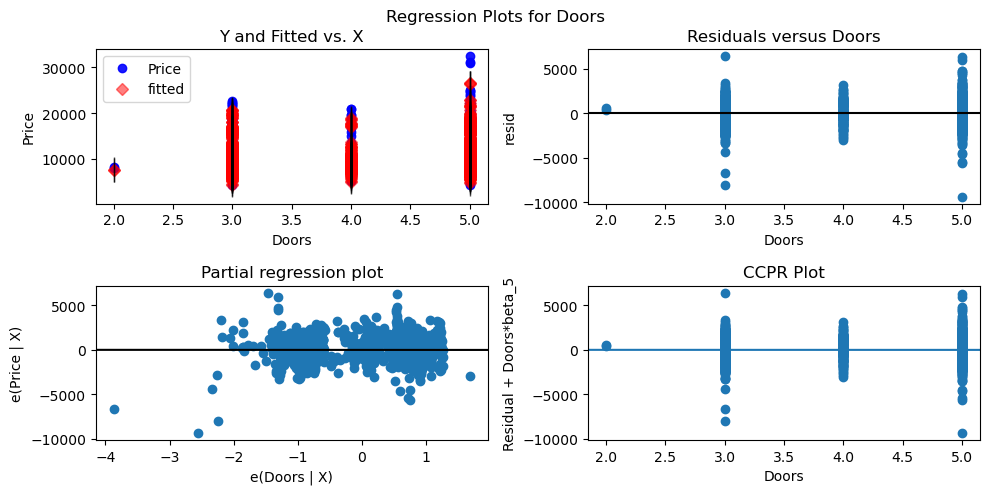

In [64]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


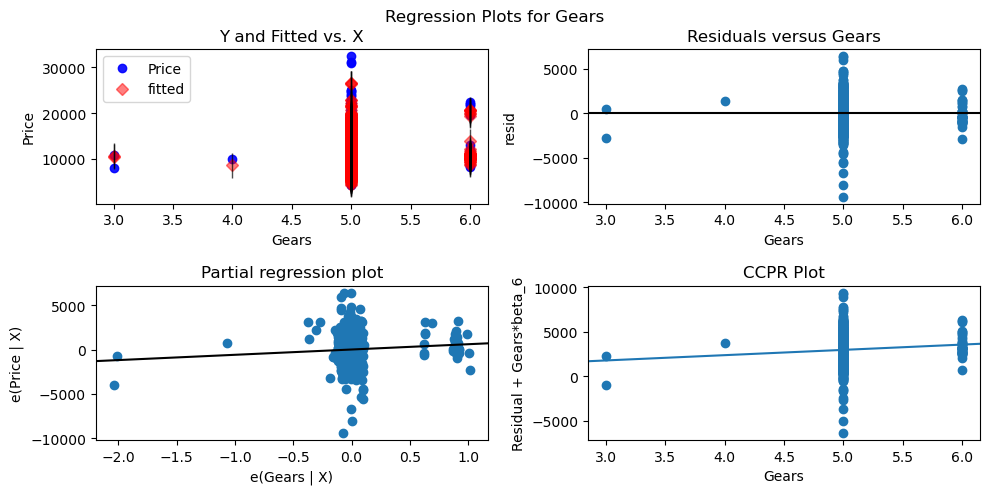

In [65]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

eval_env: 1


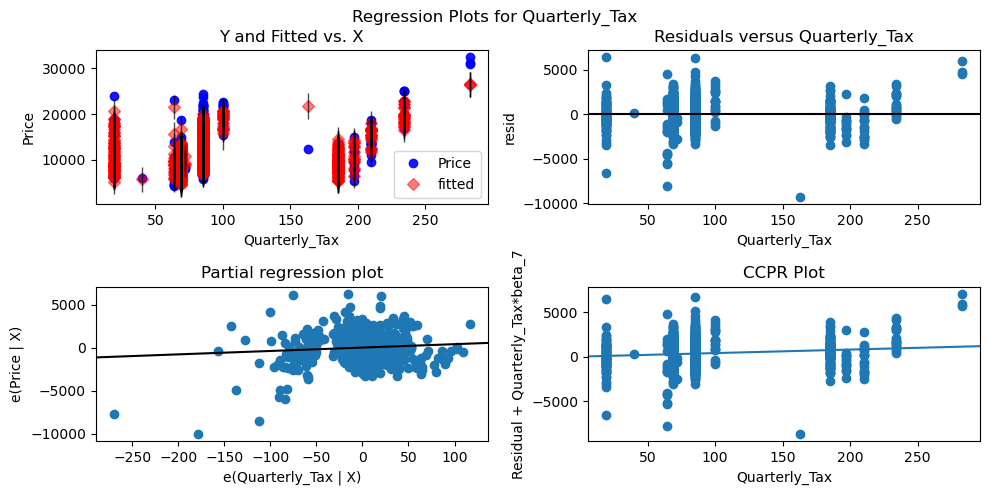

In [66]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

eval_env: 1


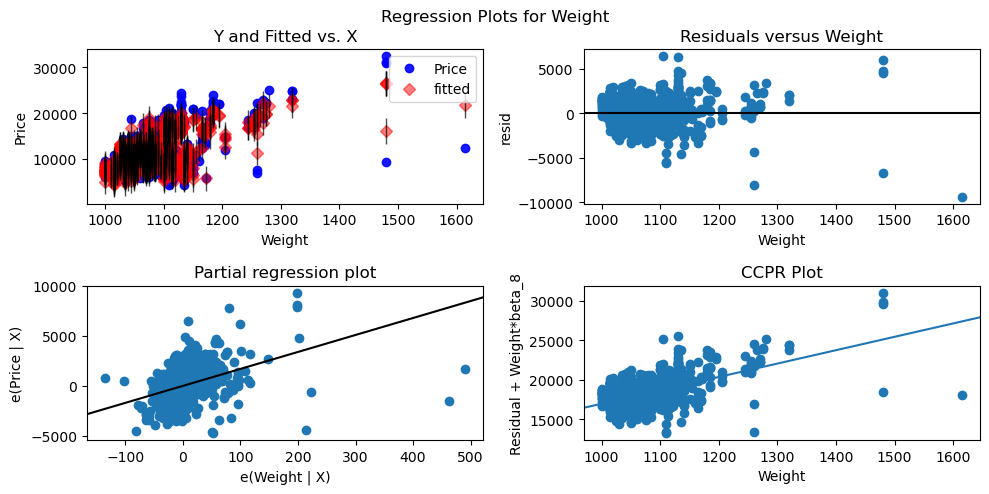

In [67]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [68]:
#cooks distance

In [69]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
k = 8
n = 1436
3*(k+1)/n

0.018802228412256268

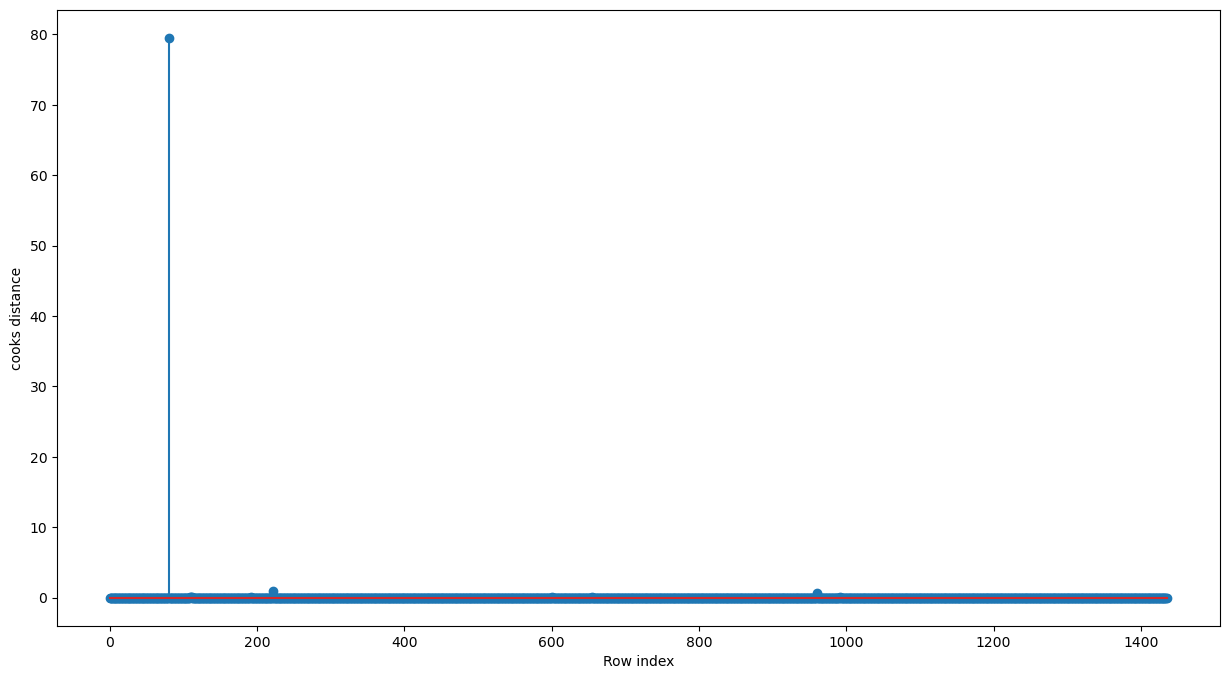

In [70]:
fig=plt.figure(figsize=(15,8))
plt.stem(np.arange(len(data_new)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [71]:
np.where(c>0.018)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

In [72]:
data_new1 = data_new.drop(data_new.index[[14,16,49,80,109,110,111,141,191,192,221,
         523,601,654,960,991,1058]],axis = 0).reset_index()

In [73]:
data_new1.head()

,index,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [74]:
data_new1 = data_new1.drop(['index'],axis=1)

In [76]:
#building model

In [77]:
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new1).fit()

In [78]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        07:57:55   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
Age            -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM               -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP               28.9815      2.768     10.472      0.000      23.552      34.410
cc               -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors          -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears           308.8824    180.506      1.711      0.087     -45.206     662.971
Quarterly_Tax     2.1111      1.358      1.555      0.120      -0.553       4.775
Weight           31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
final_model.predict(data_new1[['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight']])

0       16310.888673
1       15857.336139
2       16291.658688
3       15958.899033
4       15836.323468
            ...     
1414     9182.068160
1415     8560.624043
1416     8706.721503
1417     8819.891793
1418    10878.107228
Length: 1419, dtype: float64